Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Caleb Andree"
COLLABORATORS = ""

---

# LAB 9 Web APIs [Total: 7 points]

The purpose of this assignment is for you to practice how to collect data from a real-world Web API. This will be accomplished through a coding assignment. You will carry out this task in the present notebook, and use the notebook to document the various steps of the exercise and to answer all questions.

## Required skills

This lab will let you practice the following APIs:

- [MediaWiki &ldquo;Action&rdquo; API](https://www.mediawiki.org/wiki/API:Main_page), in particular the API for the English Wikipedia 
  + Endpoint: `https://en.wikipedia.org/w/api.php`
  + Sandbox: https://en.wikipedia.org/wiki/Special:ApiSandbox
- [Wikimedia REST API](https://wikimedia.org/api/rest_v1/#), in particular the Pageviews API 
  + Endpoint: `/metrics/pageviews/per-article/{project}/{access}/{agent}/{article}/{granularity}/{start}/{end}`
  + Note that a sandbox is available at the main link above.

    
## Table of Contents
<ul>
    <li><a href="#Submission-checklist">Submission checklist</a> [1 pt]</li>
    <li><a href="#Q1">Question 1</a> [1 pt]</li>
    <li><a href="#Q2">Question 2</a> [1 pt]</li>
    <li><a href="#Q3">Question 3</a> [1 pt]</li>
    <li><a href="#Q4">Question 4</a> [1 pt]</li>
    <li><a href="#Q5">Question 5</a> [2 pts]</li>
</ul>

## Submission checklist

**Points**: 1

Before submitting make sure that:

1. Your name is included above, plus the name of any collaborator you worked with;
2. All Markdown cells you edited are rendering correctly, especially the ones with answers.
3. You have removed any `raise NotImplementedError()` line from your code cells.

In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

## Q1

**Points**: 1

Write a function called `dogrevisions` that will download data about a fixed set of revisions of the [Wikipedia article on dogs](https://en.wikipedia.org/wiki/Dog). 

Your function should take a single parameter &ndash; the list of revisions (provided in code cell below). It should query the Wikipedia API and it should return a data frame with 10 entries.

Your data frame should look like this:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>user</th>
      <th>timestamp</th>
      <th>comment</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Johnj1995</td>
      <td>2023-10-10T22:48:48Z</td>
      <td>Undid revision 1179555499 by [[Special:Contributions/Readytowriteyay12345|Readytowriteyay12345]] ([[User talk:Readytowriteyay12345|talk]]) Unsourced</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Graph8389</td>
      <td>2023-10-11T21:16:48Z</td>
      <td>/* Breeds */</td>
    </tr>
    <tr>
      <th>2</th>
      <td>WikiCleanerBot</td>
      <td>2023-10-19T04:47:16Z</td>
      <td>v2.05b - [[User:WikiCleanerBot#T20|Bot T20 CW#61]] - Fix errors for [[WP:WCW|CW project]] (Reference before punctuation)</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Citation bot</td>
      <td>2023-10-25T16:44:10Z</td>
      <td>Add: pmc, pmid. | [[:en:WP:UCB|Use this bot]]. [[:en:WP:DBUG|Report bugs]]. | Suggested by Abductive | [[Category:Wolves]] | #UCB_Category 11/45</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Halfsentientsnail</td>
      <td>2023-10-30T06:37:11Z</td>
      <td></td>
    </tr>
    <tr>
      <th>5</th>
      <td>Justlettersandnumbers</td>
      <td>2023-10-30T09:55:00Z</td>
      <td>Restored revision 1181852947 by [[Special:Contributions/Citation bot|Citation bot]] ([[User talk:Citation bot|talk]]): Thanks, but too many mistakes (grammar, [[MOS:OL]], low-grade sources etc); perhaps try making one edit at a time?</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Citation bot</td>
      <td>2023-11-04T04:20:08Z</td>
      <td>Alter: chapter. | [[:en:WP:UCB|Use this bot]]. [[:en:WP:DBUG|Report bugs]]. | Suggested by Лисан аль-Гаиб | #UCB_webform 2/102</td>
    </tr>
    <tr>
      <th>7</th>
      <td>The Herald</td>
      <td>2023-11-05T13:17:10Z</td>
      <td>Cleaned up using [[WP:AutoEd|AutoEd]]</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Graham87</td>
      <td>2023-11-06T07:43:18Z</td>
      <td>/* See also */ undo edits by [[Special:Contributions/Alemedicen|Alemedicen]], tangential, promotional, paid editor</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Graham87</td>
      <td>2023-11-06T08:12:49Z</td>
      <td>/* Domestication */ rm duplicate text ... probably caused by a bad cut-and-paste in [[Special:Diff/1172721550|this edit]] by [[User:Hemiauchenia|Hemiauchenia]]</td>
    </tr>
  </tbody>
</table>

### Hints
For this question you should keep the timestamp column as a string (i.e. not converted to Pandas Timestamp).

For autograding purposes, your function needs to return data about the exact set of revisions below. These revisions are not the latest ones, so instead of specifying a int argument for the `rvlimit` parameter, you will need to specify the `revids=` parameter, which takes a pipe-separated (e.g. `revids=123|456`) list of revisions.

In [3]:
revisions = [
    '1183754588',
    '1183750837',
    '1183617457',
    '1183413301',
    '1182612592',
    '1182593497',
    '1181852947',
    '1180839131',
    '1179700159',
    '1179559162'
]

# YOUR CODE HERE
def dogrevisions(revisions):
    revids_param = '|'.join(map(str, revisions))

    api_url = 'https://en.wikipedia.org/w/api.php'

    params = {
        'action': 'query',
        'format': 'json',
        'prop': 'revisions',
        'revids': revids_param,
        'rvprop': 'timestamp|user|comment',
    }

    response = requests.get(api_url, params=params)
    data = response.json()

    revisions_data = []
    for page_id, page_data in data['query']['pages'].items():
        for rev in page_data['revisions']:
            revision_info = {
                'user': rev.get('user', 'N/A'),
                'timestamp': rev['timestamp'],
                'comment': rev.get('comment', 'N/A'),
            }
            revisions_data.append(revision_info)

    revisions_df = pd.DataFrame(revisions_data)

    return revisions_df
    
#raise NotImplementedError()

Run this cell to test your function. 

In [4]:
dogrevisions(revisions)

,user,timestamp,comment
0,Johnj1995,2023-10-10T22:48:48Z,Undid revision 1179555499 by [[Special:Contrib...
1,Graph8389,2023-10-11T21:16:48Z,/* Breeds */
2,WikiCleanerBot,2023-10-19T04:47:16Z,v2.05b - [[User:WikiCleanerBot#T20|Bot T20 CW#...
3,Citation bot,2023-10-25T16:44:10Z,"Add: pmc, pmid. | [[:en:WP:UCB|Use this bot]]...."
4,Halfsentientsnail,2023-10-30T06:37:11Z,
5,Justlettersandnumbers,2023-10-30T09:55:00Z,Restored revision 1181852947 by [[Special:Cont...
6,Citation bot,2023-11-04T04:20:08Z,Alter: chapter. | [[:en:WP:UCB|Use this bot]]....
7,The Herald,2023-11-05T13:17:10Z,Cleaned up using [[WP:AutoEd|AutoEd]]
8,Graham87,2023-11-06T07:43:18Z,/* See also */ undo edits by [[Special:Contrib...
9,Graham87,2023-11-06T08:12:49Z,/* Domestication */ rm duplicate text ... prob...


In [5]:
from pandas.testing import assert_frame_equal
import pandas as pd

# Read the CSV file while specifying the data types
q1STUDENT_ANSWER = dogrevisions(revisions)
q1CORRECT_ANSWER = pd.read_csv('.solutionq1.csv', keep_default_na=False)

# Return value should match solution
try:
    assert_frame_equal(q1STUDENT_ANSWER, q1CORRECT_ANSWER)
    #if no test failed, print
    print("All tests passed! 👍")
except AssertionError:
    print("Error: your solution does not match the correct one. See above for mismatching entries.")
    print()
    idx = (q1STUDENT_ANSWER != q1CORRECT_ANSWER).any(axis=1)
    print("Mismatching entries")
    print("===================")
    print()
    print("Correct: ")
    print(q1CORRECT_ANSWER[idx])
    print()
    print("Student:")
    print(q1STUDENT_ANSWER[idx])

All tests passed! 👍


## Q2

**Points**: 1

Write a function called `viewsofpage` that queries the Wikimedia REST API for the daily number of pageviews (granularity `daily`) by non-automated users only (agent: `user`) to a given Wikipedia page. Your function should accept a single argument -- the title of a Wikipedia article -- and it should return a data frame with the views from August 26, 2023 at midnight, until Oct 30, 2023 at midnight. (Your data frame should be 66 rows long.)

For example, if the article is the `Dog` one, then the first 5 rows of your data frame should look this:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>project</th>
      <th>article</th>
      <th>granularity</th>
      <th>timestamp</th>
      <th>access</th>
      <th>agent</th>
      <th>views</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023082600</td>
      <td>all-access</td>
      <td>user</td>
      <td>9391</td>
    </tr>
    <tr>
      <th>1</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023082700</td>
      <td>all-access</td>
      <td>user</td>
      <td>9956</td>
    </tr>
    <tr>
      <th>2</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023082800</td>
      <td>all-access</td>
      <td>user</td>
      <td>11052</td>
    </tr>
    <tr>
      <th>3</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023082900</td>
      <td>all-access</td>
      <td>user</td>
      <td>11307</td>
    </tr>
    <tr>
      <th>4</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023083000</td>
      <td>all-access</td>
      <td>user</td>
      <td>11731</td>
    </tr>
  </tbody>
</table>

and the last 5 rows should look like this: 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>project</th>
      <th>article</th>
      <th>granularity</th>
      <th>timestamp</th>
      <th>access</th>
      <th>agent</th>
      <th>views</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>61</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023102600</td>
      <td>all-access</td>
      <td>user</td>
      <td>11937</td>
    </tr>
    <tr>
      <th>62</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023102700</td>
      <td>all-access</td>
      <td>user</td>
      <td>10713</td>
    </tr>
    <tr>
      <th>63</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023102800</td>
      <td>all-access</td>
      <td>user</td>
      <td>8687</td>
    </tr>
    <tr>
      <th>64</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023102900</td>
      <td>all-access</td>
      <td>user</td>
      <td>9469</td>
    </tr>
    <tr>
      <th>65</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>2023103000</td>
      <td>all-access</td>
      <td>user</td>
      <td>11501</td>
    </tr>
  </tbody>
</table>

### Hints

For this question you should keep the timestamp column as a string (i.e. not converted to Pandas Timestamp).

The Wikimedia REST API expects you to include a User Agent string in the headers of your request, else it will return a 401 error. To do you can use the following user UA string taken from the popular cURL utility:

```python
# Set request headers
headers = {
    'user-agent': 'curl/7.81.0'
}

# Send the API request
response = requests.get(url, headers=headers)
```

In [6]:
# YOUR CODE HERE
def viewsofpage(title):
    headers = {
        'user-agent': 'curl/7.81.0'
    }

    api_url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/user/{title}/daily/20230826/20231030'

    url = api_url.format(title=title)

    response = requests.get(url, headers=headers)
    data = response.json()

    views_data = data['items']

    daily_views_df = pd.DataFrame(views_data)

    daily_views_df.rename(columns={'timestamp': 'timestamp', 'views': 'views'}, inplace=True)

    return daily_views_df
#raise NotImplementedError()

Call the function with the article name, e.g., `"Dog"`. Try different Wikipedia entries as well.

In [7]:
article_name = "Dog"
viewsofpage(article_name)

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Dog,daily,2023082600,all-access,user,9391
1,en.wikipedia,Dog,daily,2023082700,all-access,user,9956
2,en.wikipedia,Dog,daily,2023082800,all-access,user,11052
3,en.wikipedia,Dog,daily,2023082900,all-access,user,11307
4,en.wikipedia,Dog,daily,2023083000,all-access,user,11731
...,...,...,...,...,...,...,...
61,en.wikipedia,Dog,daily,2023102600,all-access,user,11937
62,en.wikipedia,Dog,daily,2023102700,all-access,user,10713
63,en.wikipedia,Dog,daily,2023102800,all-access,user,8687
64,en.wikipedia,Dog,daily,2023102900,all-access,user,9469


In [8]:
from pandas.testing import assert_frame_equal
import pandas as pd

dtype_dict = {
    'timestamp': object,
}

q2STUDENT_ANSWER = viewsofpage(article_name)
q2CORRECT_ANSWER = pd.read_csv('.solutionq2.csv', dtype=dtype_dict)

# Return value should match solution
try:
    assert_frame_equal(q2STUDENT_ANSWER, q2CORRECT_ANSWER)
    #if no test failed, print
    print("All tests passed! 👍")
except AssertionError:
    print("Error: your solution does not match the correct one. See above for mismatching entries.")
    print()
    idx = (q2STUDENT_ANSWER != q2CORRECT_ANSWER).any(axis=1)
    print("Mismatching entries")
    print("===================")
    print()
    print("Correct: ")
    print(q2CORRECT_ANSWER[idx])
    print()
    print("Student:")
    print(q2STUDENT_ANSWER[idx])

All tests passed! 👍


## Q3

**Points**: 1

Write a function called `viewsofmanypages` that returns the number of views to a set of Wikipedia articles. Your function should take a single parameter -- a lists of Wikipedia article titles -- and it should return a data frame with the views from August 26, 2023 (`20230826`), until Oct 30, 2023 (`20231030`), indexed by timestamp (as a Pandas DateTimeIndex) and where each column corresponds to a article title.

For example, if the titles are `['Dog', 'Cat', 'Parrot', 'Rabbit']` then your function should return a data frame with exactly 264 rows. The top 5 rows of the data frame should look like this: 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>project</th>
      <th>article</th>
      <th>granularity</th>
      <th>access</th>
      <th>agent</th>
      <th>view</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2023-08-26</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>9391</td>
    </tr>
    <tr>
      <th>2023-08-27</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>9956</td>
    </tr>
    <tr>
      <th>2023-08-28</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>11052</td>
    </tr>
    <tr>
      <th>2023-08-29</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>11307</td>
    </tr>
    <tr>
      <th>2023-08-30</th>
      <td>en.wikipedia</td>
      <td>Dog</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>11731</td>
    </tr>
  </tbody>
</table>    
and the bottom 5 like this:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>project</th>
      <th>article</th>
      <th>granularity</th>
      <th>access</th>
      <th>agent</th>
      <th>view</th>
    </tr>
    <tr>
      <th>timestamp</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2023-10-26</th>
      <td>en.wikipedia</td>
      <td>Rabbit</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>3751</td>
    </tr>
    <tr>
      <th>2023-10-27</th>
      <td>en.wikipedia</td>
      <td>Rabbit</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>3495</td>
    </tr>
    <tr>
      <th>2023-10-28</th>
      <td>en.wikipedia</td>
      <td>Rabbit</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>3426</td>
    </tr>
    <tr>
      <th>2023-10-29</th>
      <td>en.wikipedia</td>
      <td>Rabbit</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>3537</td>
    </tr>
    <tr>
      <th>2023-10-30</th>
      <td>en.wikipedia</td>
      <td>Rabbit</td>
      <td>daily</td>
      <td>all-access</td>
      <td>user</td>
      <td>3839</td>
    </tr>
  </tbody>
</table>

### Hints
The previous hint about supplying a User Agent header in your requests applies here too, see previous question.

Unlike the previous question, for this question you will need to convert the `timestamp` column into a pandas Timestamp and use the converted column as a DatetimeIndex for the data frame.

In [9]:
# YOUR CODE HERE
def viewsofmanypages(title_list):
    headers = {
        'user-agent': 'curl/7.81.0'
    }

    api_url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/user/{title}/daily/20230826/20231030'

    df_combined = pd.DataFrame()

    for title in title_list:
        url = api_url.format(title=title)

        response = requests.get(url, headers=headers)
        data = response.json()

        views_data = data['items']

        df_title = pd.DataFrame(views_data)
        df_title.rename(columns={'views': 'view'}, inplace=True)
        #df_title['views'] = title

        df_title['timestamp'] = pd.to_datetime(df_title['timestamp'], format='%Y%m%d%H')
        df_title.set_index('timestamp', inplace=True)

        df_combined = pd.concat([df_combined, df_title], axis=0, sort=False)

    return df_combined


    

#raise NotImplementedError()

Call the function with the article name, e.g., `"Dog"`. Try different sets of Wikipedia entries as well. (For example, different sports teams, or different computer brands, etc.)

In [10]:
viewsofmanypages(['Dog', 'Cat', 'Parrot', 'Rabbit'])

,project,article,granularity,access,agent,view
timestamp,,,,,,
2023-08-26,en.wikipedia,Dog,daily,all-access,user,9391
2023-08-27,en.wikipedia,Dog,daily,all-access,user,9956
2023-08-28,en.wikipedia,Dog,daily,all-access,user,11052
2023-08-29,en.wikipedia,Dog,daily,all-access,user,11307
2023-08-30,en.wikipedia,Dog,daily,all-access,user,11731
...,...,...,...,...,...,...
2023-10-26,en.wikipedia,Rabbit,daily,all-access,user,3751
2023-10-27,en.wikipedia,Rabbit,daily,all-access,user,3495
2023-10-28,en.wikipedia,Rabbit,daily,all-access,user,3426


In [11]:
from pandas.testing import assert_frame_equal
import pandas as pd

article_titles = ['Dog', 'Cat', 'Parrot', 'Rabbit']
q3STUDENT_ANSWER = viewsofmanypages(article_titles)
q3CORRECT_ANSWER = pd.read_csv('.solutionq3.csv', index_col=0, parse_dates=['timestamp'], date_format='%Y-%m-%d')

# Return value should match solution
try:
    assert_frame_equal(q3STUDENT_ANSWER, q3CORRECT_ANSWER)
    #if no test failed, print
    print("All tests passed! 👍")
except AssertionError:
    print("Error: your solution does not match the correct one. See above for mismatching entries.")
    print()
    idx = (q3STUDENT_ANSWER != q3CORRECT_ANSWER).any(axis=1)
    print("Mismatching entries")
    print("===================")
    print()
    print("Correct: ")
    print(q3CORRECT_ANSWER[idx])
    print()
    print("Student:")
    print(q3STUDENT_ANSWER[idx])

All tests passed! 👍


## Q4

**Points**: 1

Write a function called `plot_page_views` that plots the number of views to a set of Wikipedia articles. Your function should take a single parameter -- a lists of Wikipedia article titles -- and it should return a data frame with the views from August 26, 2023 at midnight, until Oct 30, 2023 at midnight. Use your function above to produce a plot of the views.

If the list of articles is `['Football', 'Tennis', 'Golf']`, then your function should produce the following plot:
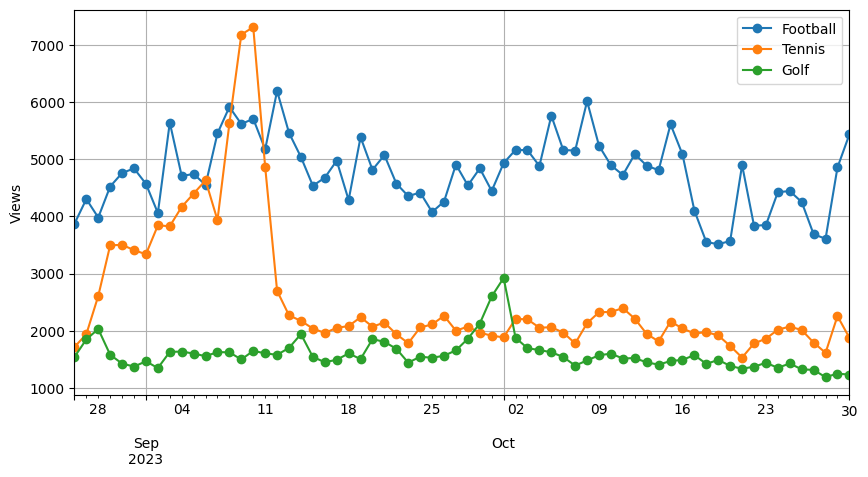

### Hints
The previous hint about supplying a User Agent header in your requests applies here too, see &ldquo;Hints&rdquo; in Q2.

Like in the previous question, in this question you will need to convert the `timestamp` column into a pandas Timestamp and use the converted column as a DatetimeIndex for the data frame.

In [12]:
# YOUR CODE HERE
def plot_page_views(title_list):
    headers = {
        'user-agent': 'curl/7.81.0'
    }

    api_url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/user/{title}/daily/20230826/20231030'

    df_combined = pd.DataFrame()

    for title in title_list:
        url = api_url.format(title=title)

        response = requests.get(url, headers=headers)
        data = response.json()

        views_data = data['items']

        df_title = pd.DataFrame(views_data)
        df_title.rename(columns={'views': title}, inplace=True)

        df_title['timestamp'] = pd.to_datetime(df_title['timestamp'], format='%Y%m%d%H')
        df_title.set_index('timestamp', inplace=True)

        df_combined = pd.concat([df_combined, df_title[title]], axis=1, sort=False)

    ax = df_combined.plot(figsize=(10, 6), title='Page Views Over Time')

    for title in title_list:
        ax.scatter(df_combined.index, df_combined[title], label=title)

    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.grid()
    plt.show()

     
#raise NotImplementedError()

Call your function in the cell below. Keep this exact argument: `['Football', 'Tennis', 'Golf']`.

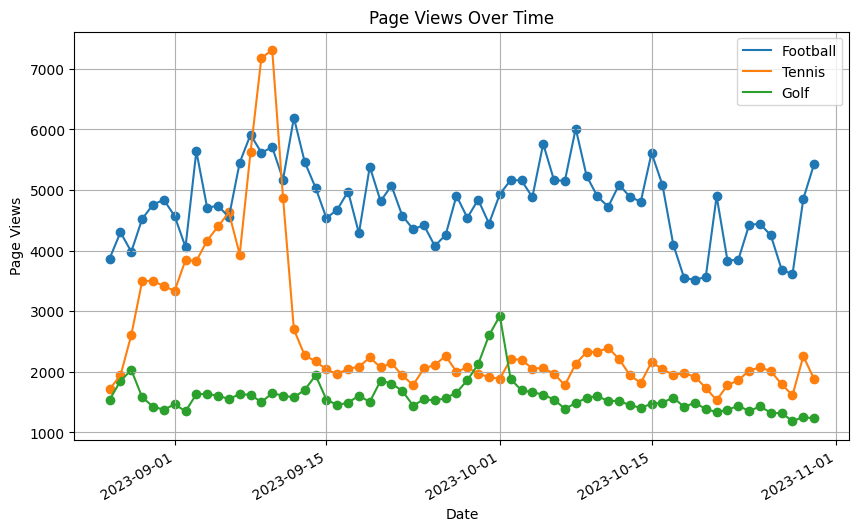

In [13]:
articles = ['Football', 'Tennis', 'Golf']
plot_page_views(articles)

## Q5

**Note**: _This question is a bonus question for those who completed Q4_.

**Points**: 2

On September 9, 2023, Novak Djokovich won the US Open (source: [ESPN (live)](https://www.espn.com/tennis/story/_/id/38373910/novak-djokovic-beats-daniil-medvedev-win-2023-us-open-24th-major-title), [EPSN (Internet Archive)](https://web.archive.org/web/20231113184915/https://www.espn.com/tennis/story/_/id/38373910/novak-djokovic-beats-daniil-medvedev-win-2023-us-open-24th-major-title)), and the entry about tennis received a lot of traffic around that time. A similar, smaller spike occurs in early december for the entry about golf, showing that traffic to Wikipedia is associated to major real-world events.


In this question, you will use the Pageviews API to perform a similar analysis.

Using, the `plot_page_views` produce a plot similar to the one above for three different Wikipedia entries, and use the plot to discover any real-world event or trends associated to those topics. The three entries you choose should be all comparable with each other. For example, you could compare video streaming services, like Netflix, Amazon Prime, and Hulu, or three different countries, etc.

Then, in the markdown cell below, write a brief description of what you find. Do you see any large spike in attention that could be attributed to an external, real-world event? Briefly describe the procedure by which one could come up with the same conclusions, including any source.

---

This question is worth 2 points:
- 1 point for producing a plot based on three comparable Wikipedia entries;
- 1 point for describing a real-world event or trend associated to those entries.

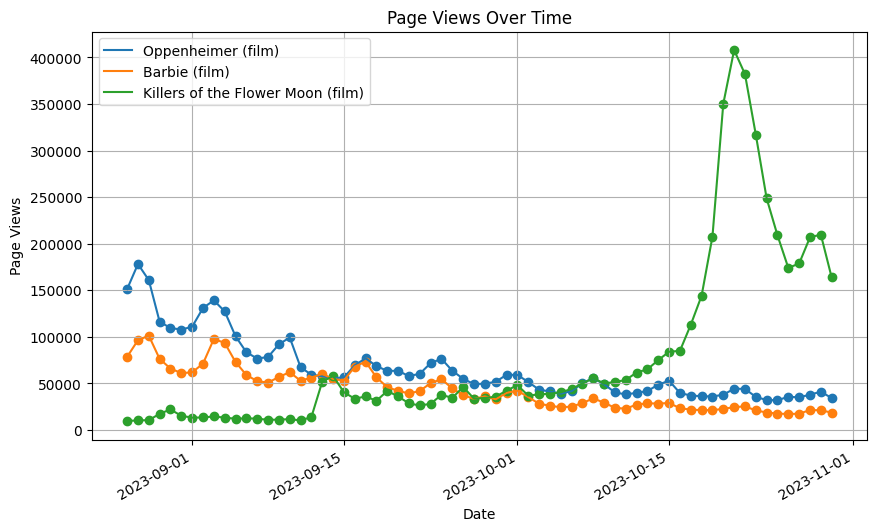

In [14]:
%matplotlib inline

# YOUR CODE HERE
articles = ['Oppenheimer (film)', 'Barbie (film)', 'Killers of the Flower Moon (film)']
plot_page_views(articles)
#raise NotImplementedError()

Write the description of the plot in the cell below:

This plot describes the number of page views for the movies Oppenheimer, Barbie and Killers of the Flower Moon. As you can see, there is a gradual decrease in page views for Oppenheimer and Barbie, while the page views for Killers of the Flower Moon drastically increase. This is due to the film releasing on October 20th, which is the date that the views spiked for that page. Oppenheimer and Barbie both released in July 2023, so that is probably why the page views are slowly declining for both of those movies. These views can be directly attributed to the popularity of the movies and the release dates as well.